In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression

In [3]:
bias = 100
X, y, coef= make_regression(n_features=2, noise=10, random_state=42, bias=bias, coef=True)

In [4]:
bias, coef

(100, array([87.73730719, 74.07686178]))

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
model = LinearRegression()

In [8]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
model.coef_

array([86.00258028, 74.11675411])

In [10]:
model.intercept_

100.21635808446094

In [95]:
model.predict(X[:10])

array([142.54856828, 105.03324069,  54.16343497, 115.12937746,
        79.87196826, 129.94656099,  80.57214453, 125.27494821,
       128.34627855, 145.7592773 ])

In [107]:
y.shape

(100,)

In [15]:
class CustomLinearReg:
    
    def __init__(self, lr=.1, max_iters=20):
        
        self.lr = lr
        self.max_iters = max_iters
    
    def fit(self, X, y):
        
        self.coef_ = np.random.randn(X.shape[1])
        self.intercept_ = np.random.random()
        
        errors = []
        for i in range(self.max_iters):
            err = self.gradient_decend(X, y)
            errors.append(err)
            
        return errors
            
    def gradient_decend(self, X, y):
        delta_coef, delta_inter, err = self.gradient(X, y)
        
        self.coef_ += delta_coef
        self.intercept_ += delta_inter
        return err
    
    def gradient(self, X, y):
        
        ya = y.reshape(-1, 1)
        yh = self.hypo(X)
        
        diff = (yh-ya)
        
        de2m = np.dot(diff.T, X).flatten()/len(X)
        de2c = np.mean(diff, axis=0)
        
        return -de2m*self.lr, -de2c*self.lr, np.mean(diff**2)
        
    def hypo(self, X):
        return np.sum(self.coef_ * X, axis=1, keepdims=True) + self.intercept_
        

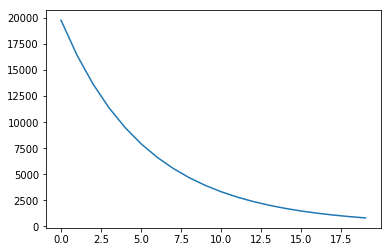

In [24]:
model = CustomLinearReg(lr=.1, max_iters=20)

errors = model.fit(X, y)

plt.figure()
plt.plot(errors)
plt.show()

In [22]:
y[:10]

array([ 50.73497677,  14.83761304, 311.22565822, 129.19656159,
       184.34809556, -32.59309441, -77.38857889, 127.3363108 ,
       293.19427371, 255.37378211])

In [14]:
y[:10]

array([ 50.73497677,  14.83761304, 311.22565822, 129.19656159,
       184.34809556, -32.59309441, -77.38857889, 127.3363108 ,
       293.19427371, 255.37378211])